![](https://media.geeksforgeeks.org/wp-content/uploads/20250418115633045690/scaling-o.webp)

## Preprocesamiento de datos

Como su nombre lo indica, el preprocesamiento es una estancia previa al ingreso de los datos en un modelo. De esta manera, se asegura el cumplimiento de los criterios básicos para minimizar la cantidad de errores.

Este paso garantiza que la información sea adecuada, es decir, que el algorítmo sea sensible a la escala de los datos. Así, por ejemplo, se otorga mayor o menor importancia a una variable según los valores tomados.

Por otro lado, ciertos algorítmos necesitan entrenarse. Esto obliga a codificar las variables categóricas en valores númericos mediante distintas técnicas.

## Escalado de datos

Al hablar del escalamiento de los datos se alude al cambio de la escala de una variable o de todo el set para que las variables tengan una misma escala y no afecten al rendimiento del modelo seleccionado. Por ejemplo, un algoritmo no supervisado llamado "vecinos más cercanos" mide la distancia de un registro a otro; si los datos no se estandarizaran, las distancias entre cada registro cambiarían drásticamente, haciendo que el algóritmo se entienda de forma distinta.

Una manera sencilla de entender el escalado es imaginar un conjunto de datos con distintas variables y que tratará de predecir si un alumno aprueba o reprueba una asignatura específica. Una de las variables es el tiempo de horas de estudios, con valores como 3 horas, 7 horas, 0 horas, entre otros. Por su parte, hay una variable que indica el número de aciertos que obtuvo en una asignatura similar cuyos valores registrados son 116, 89, 96, etcétera.

Como puedes ver, la primera variable (horas de estudio) incluye números pequeños, mientras que la segunda variable (aciertos) abarca cifras más grandes. Si estos datos se ingresan en un modelo, los valores de los aciertos tendrán más peso que las horas de estudio. Es en este caso, el escalado se vale de cálculos matemáticos para convertir los valores en datos más similares (los cuales, por lo general, rondan entre -1 y 1) para ambas variables. Esto hace que una variable no sea más «pesada» que otra y sesgue el resultado del modelo.

Como se ha comentado esto requiere de varios cálculos matemáticos, pero la librería **Scikit-learn** ofrece un módulo con distintos escaladores. A continuación, revisarás los más relevantes.

## StandardScaler

En esta ocasión, utilizarás el siguiente código: `sklearn.preprocessing`, junto con la función `StandardScaler`.

In [1]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

A continuación, se añade el siguiente código. Observa un ejemplo de este escalador, el cual estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1 (recuerda que puedes ejecutarlo).

In [3]:
x = [1, 2, 3, 3, 5, 8] #Creamos una variable x con seis elementos.
y = [2, 4, 6, 2, 3, 7] #Creamos una variable y con seis elementos.
df = pd.DataFrame({'x':x, 'y': y}, dtype = 'int64') #Usamos pd.DataFrame para hacer un conjunto de datos.
# El primero se llamará "x" y tendrá como valores la variable x que ya hicimos. Hacemos lo mismo con "y".
df

,x,y
0,1,2
1,2,4
2,3,6
3,3,2
4,5,3
5,8,7


Solicita a Python que imprima las medias de la variable `x` y de la variable `y` (ambas dentro del dataframe `df`).

In [7]:
print("Media de X: "+ str(np.mean(df['x'])))
print("Media de Y: "+ str(np.mean(df['y'])))

Media de X: 3.6666666666666665
Media de Y: 4.0


para el caso de la varianza

In [10]:
print("Varianza de X: "+ str(np.var(df['x'])))
print("Varianza de Y: "+ str(np.var(df['y'])))

Varianza de X: 5.222222222222222
Varianza de Y: 3.6666666666666665


Después, ejecuta sns.scatterplot(x, y) para observar la distribución de las variables creadas en un gráfica de dispersión usando scatterplot de la librería seaborn.

<Axes: xlabel='x', ylabel='y'>

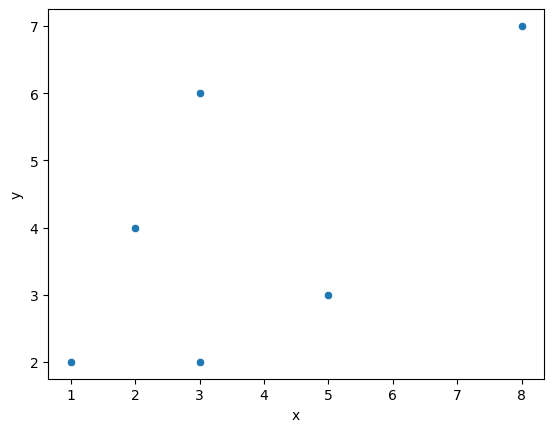

In [13]:
sns.scatterplot(x="x", y="y", data=df)

A continuación, genera una variable llamada `escalador`, que será igual a la función `StandardScaler()` y facilitará el uso de esta herramienta.

Ahota tendrás una variable llamada `transformado`, creada hace un segundo (`escalador`). Aplica una función llamada `fit_transform`, que aplicará el escalador sobre el data frame.

Así, con el siguiente código Python escalará automáticamente todos los valores dentro de `df`.


In [16]:
escalador = StandardScaler()
transformado = escalador.fit_transform(df)
transformado

array([[-1.16691993, -1.04446594],
       [-0.72932496,  0.        ],
       [-0.29172998,  1.04446594],
       [-0.29172998, -1.04446594],
       [ 0.58345997, -0.52223297],
       [ 1.89624489,  1.5666989 ]])

Al comprobar la varianza y la media de los nuevos datos escalados se obtiene:

In [19]:
print("Media de X escalado: "+ str(np.mean(transformado[:, 0]))) # Valores de X tienden a 0
print("Media de Y escalado: "+ str(np.mean(transformado[:, 1])))

Media de X escalado: 1.1102230246251565e-16
Media de Y escalado: 0.0


In [21]:
print("Varianza de X escalado: "+ str(np.var(transformado[:, 0])))
print("Varianza de Y escalado: "+ str(np.var(transformado[:, 1])))

Varianza de X escalado: 1.0
Varianza de Y escalado: 1.0


Observa que la distribución de los datos es idéntica.

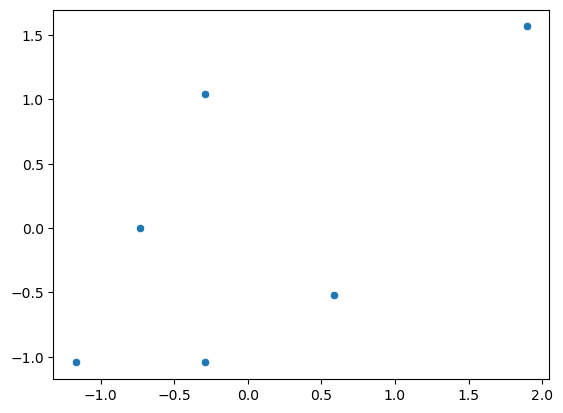

In [24]:
sns.scatterplot(x=transformado[:, 0], y=transformado[:, 1])
plt.show()

- ¿Qué diferencia notas entre los primeros valores ingresados en «x» y «y» con respecto a los valores escalados?
- ¿Qué diferencia encuentras en sus varianzas?


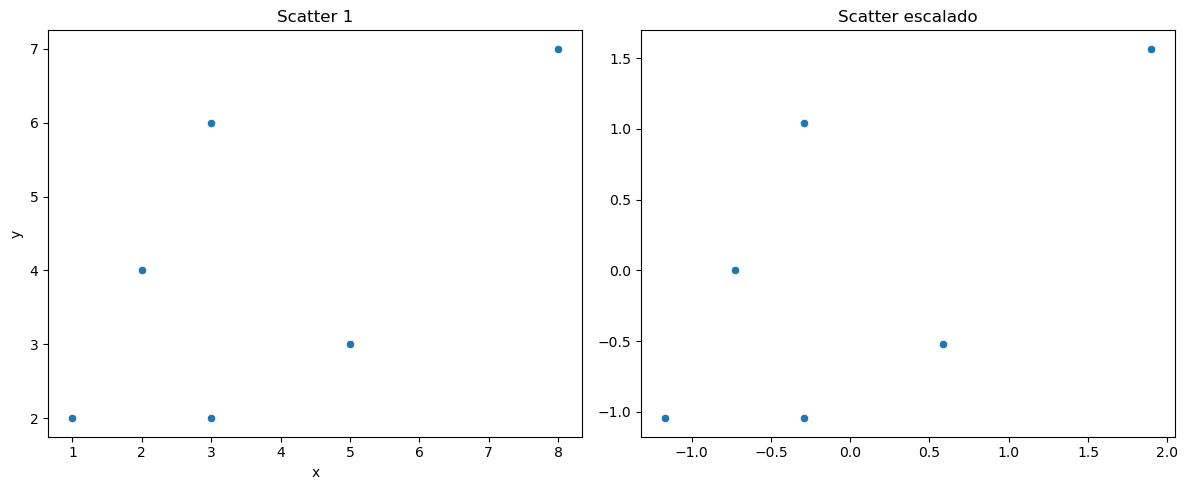

In [37]:
# Crear subplots: 1 fila, 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # ancho x alto

# Primer gráfico
sns.scatterplot(x="x", y="y", data=df,ax=axes[0])
axes[0].set_title('Scatter 1')
#axes[0].set_xlabel('x')
#axes[0].set_ylabel('y1')

# Segundo gráfico
sns.scatterplot(x=transformado[:, 0], y=transformado[:, 1], ax=axes[1])
axes[1].set_title('Scatter escalado')
#axes[1].set_xlabel('x')
#axes[1].set_ylabel('y2')

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

## MinMaxScaler

El escalador MinMaxScaler transforma las variables escalándolas a un rango (0,1); en otras palabras, el valor más pequeño puede ser 0 y el más grande es 1. Cabe señalar que este rango es personalizable mediante un proceso denominado **normalización de datos**.

Para este ejemplo, se utiliza un conjunto de datos incluido en la librería de `seaborn`. Para acceder a él, usa `.load_dataset('iris')` y asígnalo a una variable llamada `iris`.
La variable `iris` informa sobre el ancho y largo del sépalo y de los pétalos en algunas flores, para así identificar su especie.

Para trabajar este escalador, es necesario importar `MinMaxScaler` de `sklearn` usando el siguiente código:

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
iris = load_iris(as_frame=True)
iris = iris.frame

In [102]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

El siguiente paso es usar la función `MinMaxSclaer()` y asignarla a una variable (en este ejemplo, a `escaler`, aunque puedes usar el nombre que prefieras) para usarla más adelante.

In [105]:
escalador = MinMaxScaler()

Si observas el dataset `iris`, observaras que una variable no tiene valores númericos (la columna llamada `species`). Este tipo de valores no pueden escalarse y por ello conviene eliminar la columna.

Para hacer eso, `iris` solo incuirá las columnas con valores numéricos, a saber: `sepal_length`, `sepal_width`, `petal_length` y `petal_width`. Lo anterior se logra con el siguente código:


In [107]:
iris=iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']] 

Al igual que sucedió con el **escalador** anterior, se utilizará la función `.fit_transform`, que hará que Python aplique el escalado de forma automática.

In [109]:
transformado = escalador.fit_transform(iris)
transformado

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Seguro notaste que la variable `transformado` es una lista, por tanto, puede convertirse en un *dataframe* usando la función de Pandas llamada `pd.DataFrame`.

Para que el nuevo dataframe luzca más completo, sus columnas se nombrarán de la misma forma que las columnas de `iris` usando la línea de código `transformado.columns = iris.columns`

In [112]:
transformado = pd.DataFrame(transformado)
transformado.columns = iris.columns

Puedes visualizar los datos estadísticos de los valores escalados usando `.describe`.

In [115]:
transformado.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## RobustScaler

RobustScaler reduce el impacto de los valores atípicos mediante la un escalamiento de datos utilizando la mediana y que hace encajar los valores extremos. Se usa cuando los datos contienen muchos valores atípicos y se necesita mantener distancias relativas entre puntos de datos no más bajos o se está trabajando con algoritmos que son sensibles a valores extremos.

In [137]:
from sklearn.preprocessing import RobustScaler

In [139]:
iris = load_iris(as_frame=True)
iris = iris.frame

In [141]:
scaler = RobustScaler()

In [143]:
iris=iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']] 

In [145]:
transformado = scaler.fit_transform(iris)
transformado

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ],
       [-0.30769231,  1.4       , -0.81428571, -0.73333333],
       [-0.76923077,  0.8       , -0.78571429, -0.73333333],
       [-0.76923077,  0.        , -0.84285714, -0.8       ],
       [-1.15384615,  0.        , -0.92857143, -0.8       ],
       [ 0.        ,  2.        , -0.9       , -0.73333333],
       [-0.07692308,  2.8       , -0.81428571, -0.6       ],
       [-0.30769231,  1.

In [147]:
transformado = pd.DataFrame(transformado)
transformado.columns = iris.columns

In [149]:
transformado.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,1.500000e+02,150.000000
mean,0.033333,0.114667,-1.691429e-01,-0.067111
std,0.636974,0.871733,5.043709e-01,0.508158
min,-1.153846,-2.000000,-9.571429e-01,-0.800000
25%,-0.538462,-0.400000,-7.857143e-01,-0.666667
50%,0.000000,0.000000,1.266348e-16,0.000000
75%,0.461538,0.600000,2.142857e-01,0.333333
max,1.615385,2.800000,7.285714e-01,0.800000


## Comparación Escaladores

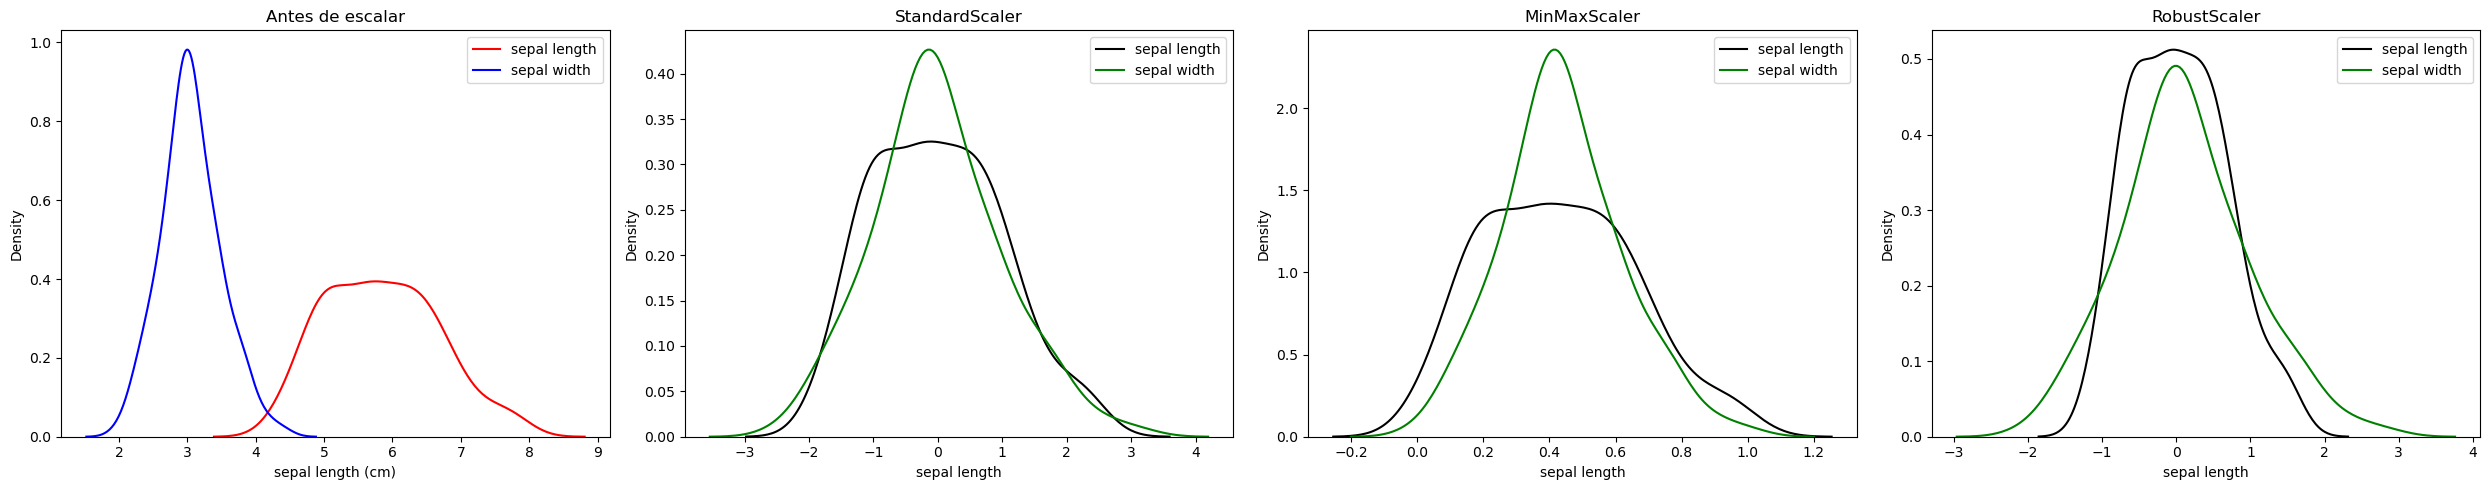

In [152]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
iris = load_iris(as_frame=True)
df = iris.frame
x = df[['sepal length (cm)', 'sepal width (cm)']]

# StandardScaler
scaler_std = preprocessing.StandardScaler()
standard_scaled = scaler_std.fit_transform(x)
standard_df = pd.DataFrame(standard_scaled, columns=['sepal length', 'sepal width'])

# MinMaxScaler
scaler_mm = preprocessing.MinMaxScaler()
minmax_scaled = scaler_mm.fit_transform(x)
minmax_df = pd.DataFrame(minmax_scaled, columns=['sepal length', 'sepal width'])

# RobustScaler
scaler_robust = preprocessing.RobustScaler()
robust_scaled = scaler_robust.fit_transform(x)
robust_df = pd.DataFrame(robust_scaled, columns=['sepal length', 'sepal width'])

# Gráfico
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(25, 5))

ax1.set_title('Antes de escalar')
sns.kdeplot(x['sepal length (cm)'], ax=ax1, color='r', label='sepal length')
sns.kdeplot(x['sepal width (cm)'], ax=ax1, color='b', label='sepal width')
ax1.legend()

ax2.set_title('StandardScaler')
sns.kdeplot(standard_df['sepal length'], ax=ax2, color='black', label='sepal length')
sns.kdeplot(standard_df['sepal width'], ax=ax2, color='g', label='sepal width')
ax2.legend()

ax3.set_title('MinMaxScaler')
sns.kdeplot(minmax_df['sepal length'], ax=ax3, color='black', label='sepal length')
sns.kdeplot(minmax_df['sepal width'], ax=ax3, color='g', label='sepal width')
ax3.legend()

ax4.set_title('RobustScaler')
sns.kdeplot(robust_df['sepal length'], ax=ax4, color='black', label='sepal length')
sns.kdeplot(robust_df['sepal width'], ax=ax4, color='g', label='sepal width')
ax4.legend()

plt.tight_layout()
plt.show()


### ¿Qué hace cada uno?

| Característica               | `StandardScaler`     | `MinMaxScaler`                           | `RobustScaler`                             |
| ---------------------------- | -------------------- | ---------------------------------------- | ------------------------------------------ |
| Objetivo                     | Media 0, std 1       | Escala al rango \[0, 1]                  | Escala con mediana y rango intercuartílico |
| Fórmula                      | $(x - \mu) / \sigma$ | $(x - x_{\min}) / (x_{\max} - x_{\min})$ | $(x - \text{mediana}) / IQR$               |
| Sensibilidad a outliers      | Alta                 | Muy alta                                 | **Baja (robusto)**                         |
| Para datos normales |✅                     | ❌                                       | ❌                                         |
| Centrado                     | Sí (en 0)            | No                                       | Sí (en la mediana)                         |


### ¿Cuándo usar cada uno?

| Situación                                     | Escalador recomendado                                         |
| --------------------------------------------- | ------------------------------------------------------------- |
| Datos normalmente distribuidos                | `StandardScaler`                                              |
| Datos con rango conocido o NN                 | `MinMaxScaler`                                                |
| Datos con **outliers significativos**         | **`RobustScaler`**                                            |
| Quieres conservar información de distribución | `StandardScaler` o `RobustScaler` dependiendo de los outliers |


# Transformación de variables categóricas

In [161]:
df=sns.load_dataset("titanic")
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
308,0,2,male,30.0,1,0,24.00,C,Second,man,True,NaN,Cherbourg,no,False
694,0,1,male,60.0,0,0,26.55,S,First,man,True,NaN,Southampton,no,True
684,0,2,male,60.0,1,1,39.00,S,Second,man,True,NaN,Southampton,no,False
758,0,3,male,34.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
237,1,2,female,8.0,0,2,26.25,S,Second,child,False,NaN,Southampton,yes,False


Si exploras el _dataset_, notarás que la variable (o columna) llamada `sex` contiene dos opciones: `male` o `female`. Ahora, `.value_counts() ` se utiliza para conocer los tipos de datos categóricos y cuántas veces se repiten en una variable o columna.

In [170]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

En el ejemplo de arriba se observa que, al usar`value_counts` en la columna `sex`de  `df`, existen dos valores: uno llamado `male`, que se repite 577 veces y `female`, que se repite 314 veces.

Observa otro ejemplo. En la columna `embarked` hay tres valores posibles.

Así se escribiría el código:

In [196]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

Un último ejemplo se observa con la variable `class`, que tiene tres posibles valores, apreciables con el código:

In [199]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

Las variables categóricas se pueden detectar con la información del conjunto de datos, en este ejemplo, son `category` y `object`.

Recuerda que esto puede saberse la función `.info()`.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Label Encoding


Con ayuda de este transformador, se asigna un número a la categória encontada; por ejemplo, la variable `class` abarca las categorías:

- `Third`
- `First`
- `Second`

Nota: se encuentran organizados por orden de aparición.

Al utilizar el escalador se obtienen las siguientes entradas:

- El valor `First` se renombra como `0`.
- El valor `Second` se llamará `1`.
- El valor `Third` se convierte en `2`.

Nota: Cuando se utiliza el **Label encoding**, los valores categóricos se ordenan alfabéticamente, de modo que al primer valor le llamará 0; al segundo, 1; al tercero, 2 y así sucesivamente.

Para utlizar esta herramienta es necesario importarla con el código `from sklearn.preprocessing import LabelEncoder` y ejecutarla como se muestra abajo.

In [206]:
from sklearn.preprocessing import LabelEncoder

In [208]:
transformador = LabelEncoder()

In [210]:
df['class'] = transformador.fit_transform(df['class'])

In [212]:
df['class']

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int64

In [215]:
df['class'].value_counts()

2    491
0    216
1    184
Name: class, dtype: int64

Si se olvidaran los valores originales, se recurre a `.classes` en el transformador para señalizarlos.

In [221]:
transformador.classes_

array(['First', 'Second', 'Third'], dtype=object)

## OneHotEncoding

Algunos modelos pueden malinterpretar los valores cuando los datos se transforman con "Labelencoder"; por ejemplo, en el paso anterior existían 3 categorías, por tanto, la categoria asignada con el número 2 valía el doble que la categoría con el número 0.
¿La afirmación anterior es cierta? No, porque existe otra alternativa, como **OneHotEncoder**, que genera tantas columnas como posibles categorías se tengan de una variable y asigna valores binarios (0,1) para evitar este tipo de interpretación de algunos algoritmos. Finalmente, las variables creadas normalmente reciben el nombre de _«dummy»_.

In [231]:
from sklearn.preprocessing import OneHotEncoder

In [233]:
transformador = OneHotEncoder()

In [235]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,2,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,2,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,2,man,True,NaN,Southampton,no,True


In [237]:
enc_df = pd.DataFrame(transformador.fit_transform(df[['sex']]).toarray())

In [239]:
enc_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [241]:
df = df.join(enc_df)

In [243]:
df[['sex',0,1]]

,sex,0,1
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0
...,...,...,...
886,male,0.0,1.0
887,female,1.0,0.0
888,female,1.0,0.0
889,male,0.0,1.0


### Ejercicio camiar el nombre de las columnas 0: Female y 1: Male